# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.5/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.5/12.8 MB 1.3 MB/s eta 0:00:10
     -- ------------------------------------ 0.8/12.8 MB 633.2 kB/s eta 0:00:19
     --- ----------------------------------- 1.3/12.8 MB 958.5 kB/s eta 0:00:12
     --- ----------------------------------- 1.3/12.8 MB 958.5 kB/s eta 0:00:12
     ---- ---------------------------------- 1.6/12.8 MB 911.5 kB/s eta 0:00:13
     ---- ---------------------------------- 1.6/12.8 MB 911.5 kB/s eta 0:00:13
     ------ -------------------------------- 2.1/12.8 MB 939.6 kB/s eta 0:00:12
     ------- ------------------------------- 2.4/12.8 MB 993.9 kB/s eta 0:00:11
     -------- ------------------------------- 2.6/12.8 MB 1

## Importing the necessary libraries

In [6]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [118]:
# Import the first file - True.csv
true_df = pd.read_csv(r'E:/True.csv')
# Import the second file - Fake.csv
fake_df = pd.read_csv(r'E:/Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [119]:
# Inspect the DataFrame with True News to understand the given data

# Viewing the first 5 rows
print("\n 1.TRUE News -- First 5 rows:\n","-"*27)
display(true_df.head())

# View info about columns, types, and non-null counts
print("\n 2.Info from DataFrame:\n","-"*21)
true_df.info()

# Check for missing values
print("\n 3.Missing values:\n","-"*16)
print(true_df.isnull().sum())

# Describe numeric and object/text columns
print("\n 4.Descriptive statistics:\n","-"*24)
display(true_df.describe(include='all'))


 1.TRUE News -- First 5 rows:
 ---------------------------


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017


 2.Info from DataFrame:
 ---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB

 3.Missing values:
 ----------------
title    0
text     0
date     0
dtype: int64

 4.Descriptive statistics:
 ------------------------


title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text                date  
count                                               21417               21417  
unique                                              21192                 716  
top     (Reuters) - Highlights for U.S. President Dona...  December 20, 2017   
freq                                                    8                 182

In [120]:
# Inspect the DataFrame with Fake News to understand the given data

# Viewing the first 5 rows
print("\n 1.FAKE News -- First 5 rows:\n","-"*27)
display(fake_df.head())

# View info about columns, types, and non-null counts
print("\n 2.Info from DataFrame:\n","-"*21)
fake_df.info()

# Check for missing values
print("\n 3.Missing values:\n","-"*16)
print(fake_df.isnull().sum())

# Describe numeric and object/text columns
print("\n 4.Descriptive statistics:\n","-"*24)
display(fake_df.describe(include='all'))


 1.FAKE News -- First 5 rows:
 ---------------------------


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017


 2.Info from DataFrame:
 ---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB

 3.Missing values:
 ----------------
title    21
text     21
date     42
dtype: int64

 4.Descriptive statistics:
 ------------------------


title   text          date
count                                               23502  23502         23481
unique                                              17914  17466          1692
top     MEDIA IGNORES Time That Bill Clinton FIRED His...         May 10, 2017
freq                                                    6    626            46

In [121]:
# Print the column details for True News DataFrame
print("True News DataFrame Columns:")
print("-->",true_df.columns)
print("\nColumn Data Types:")
print(true_df.dtypes)

True News DataFrame Columns:
--> Index(['title', 'text', 'date'], dtype='object')

Column Data Types:
title    object
text     object
date     object
dtype: object


In [122]:
# Print the column details for Fake News Dataframe
print("Fake News DataFrame Columns:")
print("-->",fake_df.columns)
print("\nColumn Data Types:")
print(fake_df.dtypes)

Fake News DataFrame Columns:
--> Index(['title', 'text', 'date'], dtype='object')

Column Data Types:
title    object
text     object
date     object
dtype: object


In [123]:
# Print the column names of both DataFrames

# Column names for True News DataFrame
print("📜True News DataFrame Columns:")
print(list(true_df.columns))

# Column names for Fake News DataFrame
print("\n📜 Fake News DataFrame Columns:")
print(list(fake_df.columns))

📜True News DataFrame Columns:
['title', 'text', 'date']

📜 Fake News DataFrame Columns:
['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [124]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [125]:
# Combine the true and fake news DataFrames into a single DataFrame

news_df = pd.concat([true_df, fake_df], ignore_index=True)

#Performing 100% sampling, so that all the rows are shuffled and this can prevent 
#bias from ordering effects in the dataset.
news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [126]:
# Display the first 5 rows of the combined DataFrame to verify the result
print("Combined DataFrame shape:", news_df.shape)
news_df.head()

#Additionally verifying true label count to see if the label count is as expected
count_true_news = news_df[news_df['news_label'] == 1].shape[0]
print(f"Number of rows with news_label == 1 --> {count_true_news}")

Combined DataFrame shape: (44940, 4)
Number of rows with news_label == 1 --> 21417


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [127]:
# Check Presence of Null Values
print("Null Values in Each Column:")
print(news_df.isnull().sum())

Null Values in Each Column:
title         21
text          21
date          42
news_label     0
dtype: int64


In [128]:
# Handle Rows with Null Values

# Filling all null values with an empty string
news_df.fillna("", inplace=True)

# Verify
print("After filling nulls with empty strings:")
print(news_df.isnull().sum())

After filling nulls with empty strings:
title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [129]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_df['news_text'] = news_df['title'].fillna('') + " " + news_df['text'].fillna('')
# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_df.drop(columns=['title', 'text', 'date'], inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
print("✔️ Updated DataFrame with combined news text:")
news_df.head()

✔️ Updated DataFrame with combined news text:


news_label                                          news_text
0           0   The Very Scary Reason Trump’s Evangelicals Do...
1           0   Catholic Church: It Is Not ‘Necessary’ For Bi...
2           0   Ivanka Trump’s Hypocritical Mother’s Day Mess...
3           0  Eyewash: CIA Elites Misleading Employees Indic...
4           1  Iran says it does not interfere in Lebanese st...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [130]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = news_df.copy()
# Add 'news_label' column to the new dataframe for topic identification
#news_label column has already been added in the df in the steps above, hence not adding it again here

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [131]:
# Write the function here to clean the text and remove all the unnecessary elements
import re

def clean_text(text):
    
# Convert to lower case
    text = text.lower()
# Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
# Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
# Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    #Additionally removing extra white spaces 
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [132]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = df_clean['news_text'].apply(clean_text)

#View the Data from the DataFrame
print("Cleaned DataFrame sample:")
print(df_clean[['news_text', 'cleaned_text', 'news_label']].head())

Cleaned DataFrame sample:
                                           news_text  \
0   The Very Scary Reason Trump’s Evangelicals Do...   
1   Catholic Church: It Is Not ‘Necessary’ For Bi...   
2   Ivanka Trump’s Hypocritical Mother’s Day Mess...   
3  Eyewash: CIA Elites Misleading Employees Indic...   
4  Iran says it does not interfere in Lebanese st...   

                                        cleaned_text  news_label  
0  the very scary reason trumps evangelicals dont...           0  
1  catholic church it is not necessary for bishop...           0  
2  ivanka trumps hypocritical mothers day message...           0  
3  eyewash cia elites misleading employees indica...           0  
4  iran says it does not interfere in lebanese st...           1  


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [133]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

import nltk
from nltk.tag import DefaultTagger
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

# Initialize components
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
default_tagger = DefaultTagger('NN')  # Default tagger marks everything as NN

def is_plural_noun(word):
    """Simple heuristic to identify plural nouns"""
    # Common plural endings
    plural_endings = ('s', 'es', 'ies')
    
    # Common irregular plurals
    irregular_plurals = {
        'children', 'men', 'women', 'people', 
        'teeth', 'feet', 'mice', 'geese'
    }
    
    # Check if word ends with plural ending or is irregular plural
    return (word.endswith(plural_endings) or (word in irregular_plurals))

def process_text(text):
    """Process text to extract lemmatized nouns (NN/NNS) using default tagger with plural detection"""
    if not isinstance(text, str) or not text.strip():
        return []
    
    try:
        tokens = word_tokenize(text.lower())
        tagged = default_tagger.tag(tokens)  # Everything gets tagged as NN
        
        nouns = []
        for word, tag in tagged:
            if (word not in stop_words and 
                word.isalpha() and 
                len(word) > 2):  # Basic length filter
                
                # Determine if word is plural
                pos_tag = 'NNS' if is_plural_noun(word) else 'NN'
                
                # Only process if it's a noun (NN or NNS)
                if pos_tag in ['NN', 'NNS']:
                    lemma = lemmatizer.lemmatize(word, pos='n')
                    nouns.append(lemma)
        
        return nouns
    
    except Exception as e:
        print(f"Error processing text: {str(e)[:100]}...")
        return []

# Example usage:
sample_text = "The cats are chasing mice while the children play with toys"
result = process_text(sample_text)
print(result)

['cat', 'chasing', 'mouse', 'child', 'play', 'toy']


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [134]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['cleaned_text'].apply(process_text)
print(df_clean.head())

   news_label                                          news_text  \
0           0   The Very Scary Reason Trump’s Evangelicals Do...   
1           0   Catholic Church: It Is Not ‘Necessary’ For Bi...   
2           0   Ivanka Trump’s Hypocritical Mother’s Day Mess...   
3           0  Eyewash: CIA Elites Misleading Employees Indic...   
4           1  Iran says it does not interfere in Lebanese st...   

                                        cleaned_text  \
0  the very scary reason trumps evangelicals dont...   
1  catholic church it is not necessary for bishop...   
2  ivanka trumps hypocritical mothers day message...   
3  eyewash cia elites misleading employees indica...   
4  iran says it does not interfere in lebanese st...   

                                     lemmatized_text  
0  [scary, reason, trump, evangelicals, dont, car...  
1  [catholic, church, necessary, bishop, report, ...  
2  [ivanka, trump, hypocritical, mother, day, mes...  
3  [eyewash, cia, elite, misleadin

### Save the Cleaned data as a csv file (Recommended)

In [135]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [136]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label                                          news_text  \
0           0   The Very Scary Reason Trump’s Evangelicals Do...   
1           0   Catholic Church: It Is Not ‘Necessary’ For Bi...   
2           0   Ivanka Trump’s Hypocritical Mother’s Day Mess...   
3           0  Eyewash: CIA Elites Misleading Employees Indic...   
4           1  Iran says it does not interfere in Lebanese st...   

                                        cleaned_text  \
0  the very scary reason trumps evangelicals dont...   
1  catholic church it is not necessary for bishop...   
2  ivanka trumps hypocritical mothers day message...   
3  eyewash cia elites misleading employees indica...   
4  iran says it does not interfere in lebanese st...   

                                     lemmatized_text  
0  ['scary', 'reason', 'trump', 'evangelicals', '...  
1  ['catholic', 'church', 'necessary', 'bishop', ...  
2  ['ivanka', 'trump', 'hypocritical', 'mother', ...  
3  ['eyewash', 'cia', 'elite', 'misleading', 'emp...  
4  ['iran', 'say', 'interfere', 'lebanese', 'stat...

In [137]:
# Check the dimensions of the DataFrame
df_clean.shape

(44940, 4)

In [138]:
# Check the number of non-null entries and data types of each column

# Summary of the DataFrame
print("\nDataFrame Summary:")
print(df_clean.info())

# Checking memory usage to understand if any optimization is needed
print("\nMemory Usage:")
print(df_clean.memory_usage(deep=True))

# For the lemmatized_text column specifically
if 'lemmatized_text' in df_clean.columns:
    print("\nLemmatized Text Stats:")
    print(f"Total rows: {len(df_clean)}")
    print(f"Non-empty lists: {df_clean['lemmatized_text'].apply(lambda x: len(x) > 0).sum()}")
    print(f"Average nouns per text: {df_clean['lemmatized_text'].apply(len).mean():.2f}")


DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44940 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44940 non-null  int64 
 1   news_text        44940 non-null  object
 2   cleaned_text     44910 non-null  object
 3   lemmatized_text  44940 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None

Memory Usage:
Index                    128
news_label            359520
news_text          184580445
cleaned_text       112001825
lemmatized_text    112106588
dtype: int64

Lemmatized Text Stats:
Total rows: 44940
Non-empty lists: 44940
Average nouns per text: 2437.16


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [139]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data


from sklearn.model_selection import train_test_split

# Splitting df_clean into train and validation sets
train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42)

print(f"Training data set size --> {len(train_df)}")
print(f"Validation data set size --> {len(val_df)}")

Training data set size --> 31458
Validation data set size --> 13482


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [140]:
# Add a new column to calculate the character length of cleaned news text
df_clean['cleaned_text_length'] = df_clean['cleaned_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['lemmatized_text_length'] = df_clean['lemmatized_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

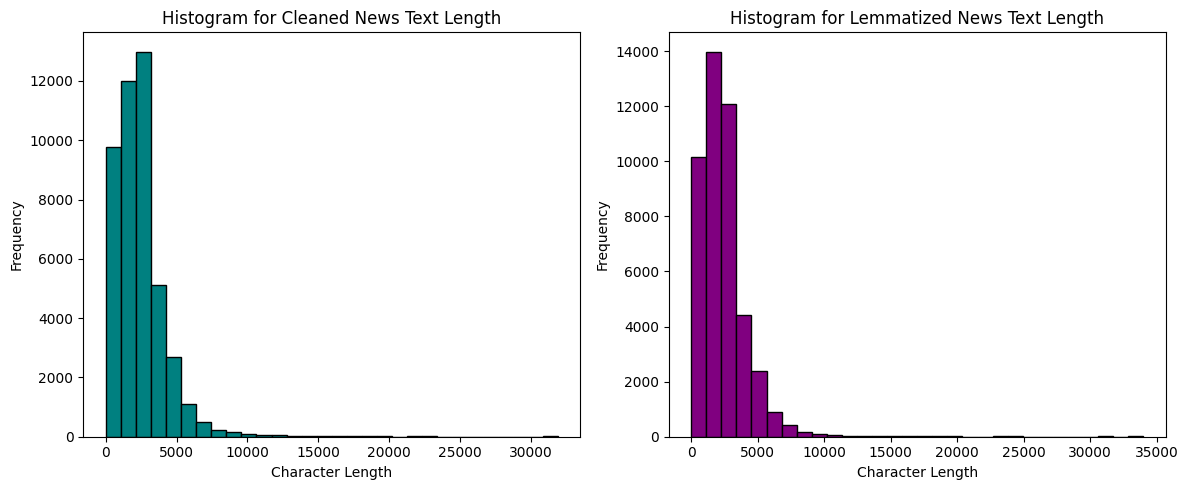

In [141]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 5))
# Add histogram for cleaned news text
plt.subplot(1, 2, 1)
plt.hist(df_clean['cleaned_text_length'], bins=30, color='teal', edgecolor='black')
plt.title('Histogram for Cleaned News Text Length')
plt.xlabel('Character Length')
plt.ylabel('Frequency')

# Add histogram for lemmatized news text with POS tags removed
plt.subplot(1, 2, 2)
plt.hist(df_clean['lemmatized_text_length'], bins=30, color='purple', edgecolor='black')
plt.title('Histogram for Lemmatized News Text Length')
plt.xlabel('Character Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [142]:
#Viewing the count of True News before proceeding with the next step
count_true_news = df_clean[df_clean['news_label'] == 1].shape[0]
print(f"Number of rows with news_label == 1 --> {count_true_news}")

Number of rows with news_label == 1 --> 21417


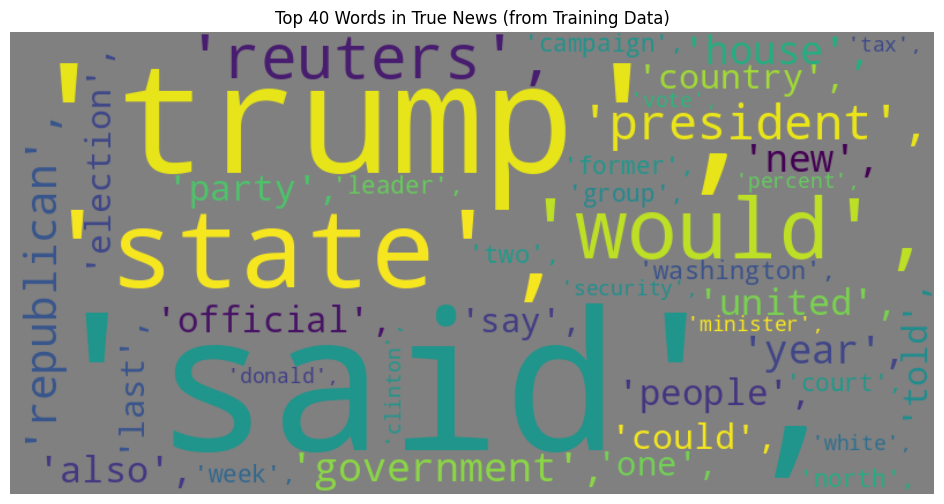

In [143]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_df = train_df[train_df['news_label'] == 1]

#Converting 'lemmatized_text' to string and handling non-string values 
texts = true_news_df['lemmatized_text'].dropna().apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Join the above text into one large string
combined_text = " ".join(texts)

# To find the top 40 words by frequency among True News , Split text into words and count frequencies
words = combined_text.split()

# Count word frequencies
word_freq = Counter(words)
top_40_words = dict(word_freq.most_common(40))

# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, background_color='grey').generate_from_frequencies(top_40_words)

# Visualize the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (from Training Data)')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

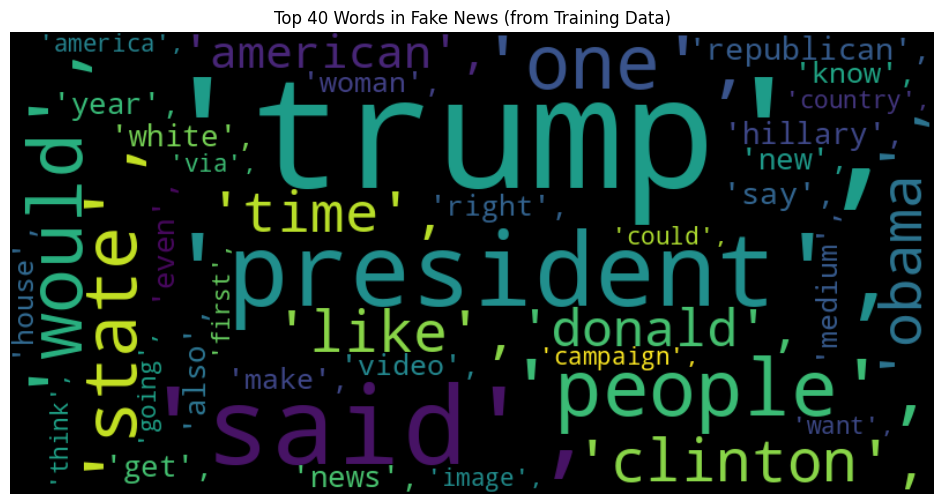

In [144]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_df = train_df[train_df['news_label'] == 0]

#Converting 'lemmatized_text' to string and handling non-string values 
texts = fake_news_df['lemmatized_text'].dropna().apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Join the above text into one large string
combined_text = " ".join(texts)

# To find the top 40 words by frequency among Fake News , Split text into words and count frequencies
words = combined_text.split()
word_freq = Counter(words)
top_40_words = dict(word_freq.most_common(40))

# Generate word cloud for Fake News
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(top_40_words)

# Visualize the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (from Training Data)')
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [145]:
# Write a function to get the specified top n-grams

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(texts, n=10, ngram_range=(2, 2)):
    """ This function extracts top n n-grams from a list/series of texts.
    
    Args:
        texts (list or pd.Series) --> Collection of text documents (strings).
        n (int) --> Number of top n-grams to return.
        ngram_range (tuple) --> The lower and upper boundary of the n-gram range (e.g., (2,2) for bigrams).
        
    Returns:
        List of tuples --> [(ngram, frequency), ...] sorted by frequency descending. """
    
    # Initializing the CountVectorizer for the given n-gram range
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    
    # Perform Fit and transform on the texts to get a document-term matrix
    X = vectorizer.fit_transform(texts)
    
    # Sum the counts of each n-gram over all the documents
    sums = X.sum(axis=0)
    
    # Mapping the n-gram feature names to their frequencies
    freqs = [(ngram, sums[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    
    # Sorting by the frequency descending and returning the top n
    top_ngrams = sorted(freqs, key=lambda x: x[1], reverse=True)[:n]
    
    return top_ngrams

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [146]:
# Handle NaN values in the text data
if hasattr(texts, 'fillna'):
    texts = texts.fillna('')
else:
    texts = [t if t is not None else '' for t in texts]

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 unigrams from True News:
said: 69614
trump: 41777
state: 26105
reuters: 19912
president: 19246
republican: 16164
government: 13837
year: 13121
house: 13023
new: 12317


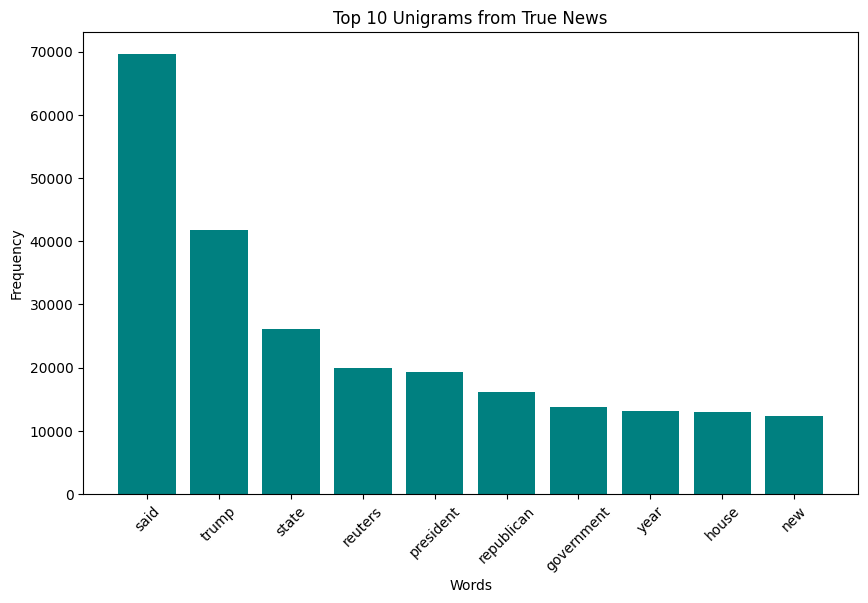

In [147]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Filtering the  true news
true_news_df = train_df[train_df['news_label'] == 1]

# Preparing texts --> converting lemmatized_text (list of tokens) to string, handling NaNs
texts = true_news_df['lemmatized_text'].dropna().apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Replacing NaNs or empty safely (if any)
texts = texts.fillna('') if hasattr(texts, 'fillna') else texts

# Using CountVectorizer to get unigrams frequency
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))
X = vectorizer.fit_transform(texts)

# Sum counts of each unigram
word_counts = X.sum(axis=0)

# Mapping vocabulary to counts
word_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Retrieve the top 10 unigrams
top_10_unigrams = word_freq[:10]

# Print top 10 unigrams with frequencies
print("Top 10 unigrams from True News:")
for word, count in top_10_unigrams:
    print(f"{word}: {count}")

# Visualize in bar graph
words, counts = zip(*top_10_unigrams)
plt.figure(figsize=(10,6))
plt.bar(words, counts, color='teal')
plt.title('Top 10 Unigrams from True News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 bigrams from True News:
united state--> 8723
donald trump--> 7181
white house--> 6438
washington reuters--> 4543
north korea--> 4486
president donald--> 4160
new york--> 3196
prime minister--> 2899
said statement--> 2770
trump said--> 2574


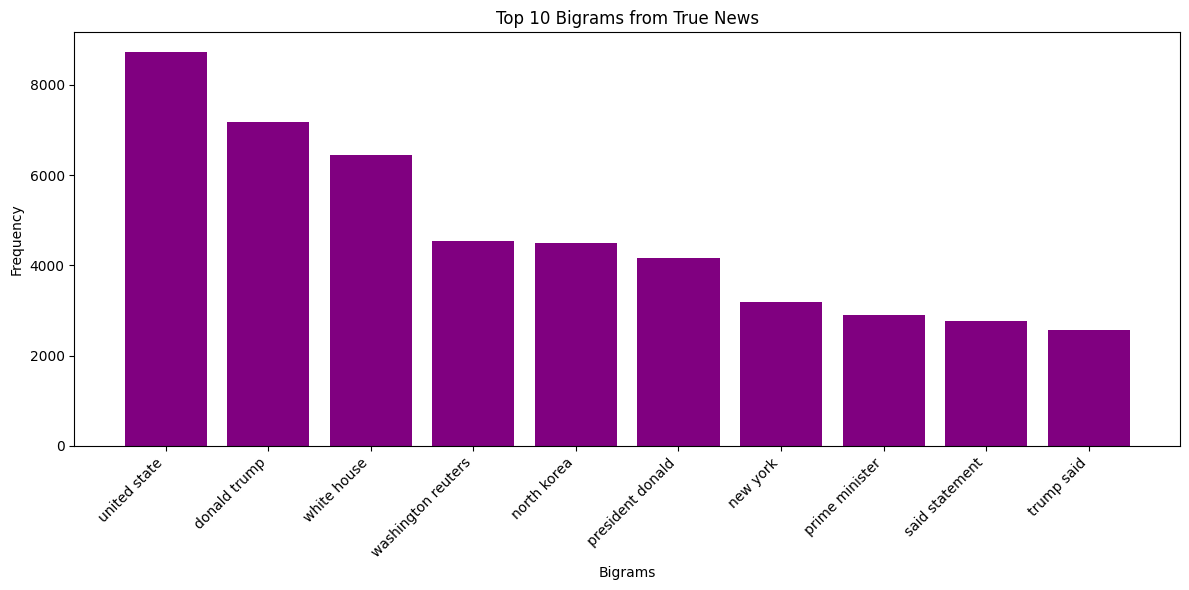

In [148]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Filtering true news
true_news_df = train_df[train_df['news_label'] == 1]

# Preparing texts --> converting lemmatized_text (list of tokens) to string, handling NaNs
texts = true_news_df['lemmatized_text'].dropna().apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
texts = texts.fillna('') if hasattr(texts, 'fillna') else texts

# Using CountVectorizer to get bigrams frequency
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))
X = vectorizer.fit_transform(texts)

# Sum counts of each bigram
bigram_counts = X.sum(axis=0)

# Mapping the vocabulary to counts
bigram_freq = [(bigram, bigram_counts[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# Retrieve the top 10 bigrams
top_10_bigrams = bigram_freq[:10]

# Print top 10 bigrams with frequencies
print("Top 10 bigrams from True News:")
for bigram, count in top_10_bigrams:
    print(f"{bigram}--> {count}")

# Visualize in bar graph
bigrams, counts = zip(*top_10_bigrams)
plt.figure(figsize=(12,6))
plt.bar(bigrams, counts, color='purple')
plt.title('Top 10 Bigrams from True News')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 trigrams from True News:
president donald trump --> 4117
president barack obama --> 1379
reuters president donald --> 1104
washington reuters president --> 946
white house said --> 682
president barack obamas --> 646
presidentelect donald trump --> 580
president vladimir putin --> 566
respond request comment --> 563
new york reuters --> 521


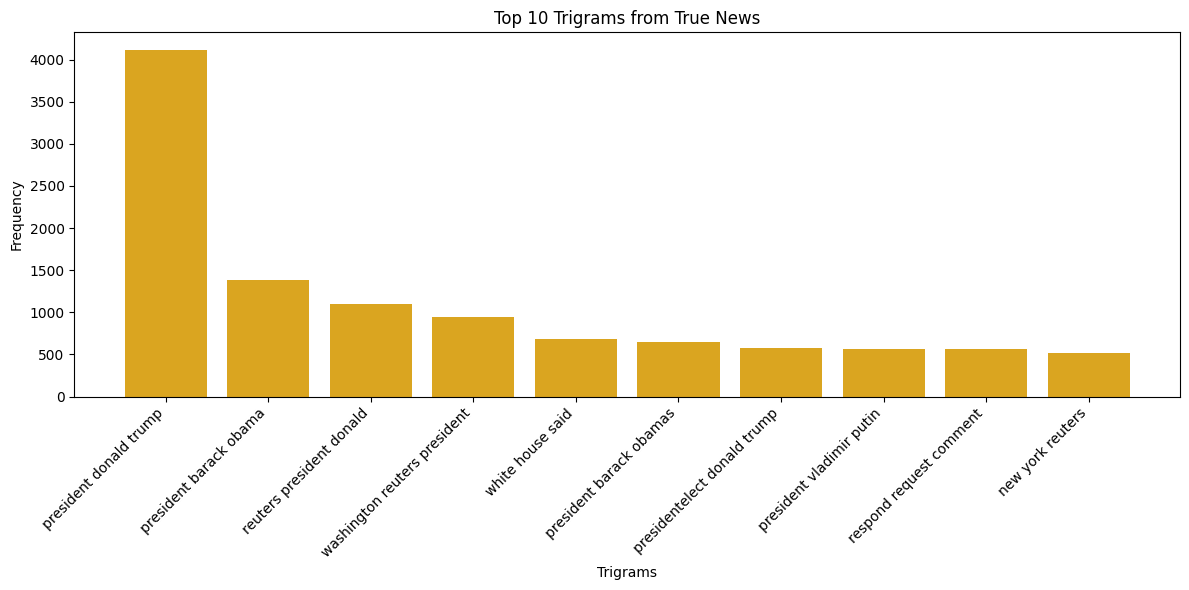

In [149]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Filtering true news
true_news_df = train_df[train_df['news_label'] == 1]

# Preparing texts --> converting lemmatized_text (list of tokens) to string, handling NaNs
texts = true_news_df['lemmatized_text'].dropna().apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
texts = texts.fillna('') if hasattr(texts, 'fillna') else texts

# Using CountVectorizer to get trigrams frequency
vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3))
X = vectorizer.fit_transform(texts)

# Sum counts of each trigram
trigram_counts = X.sum(axis=0)

# Mapping the vocabulary to counts
trigram_freq = [(trigram, trigram_counts[0, idx]) for trigram, idx in vectorizer.vocabulary_.items()]
trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)

# Retrieve top 10 trigrams
top_10_trigrams = trigram_freq[:10]

# Print top 10 trigrams with frequencies
print("Top 10 trigrams from True News:")
for trigram, count in top_10_trigrams:
    print(f"{trigram} --> {count}")

# Visualize in bar graph
trigrams, counts = zip(*top_10_trigrams)
plt.figure(figsize=(12,6))
plt.bar(trigrams, counts, color='goldenrod')
plt.title('Top 10 Trigrams from True News')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 unigrams from Fake News:
trump --> 57001
said --> 21618
president --> 18800
people --> 18600
state --> 15806
clinton --> 13886
obama --> 13581
like --> 13058
time --> 12656
donald --> 12496


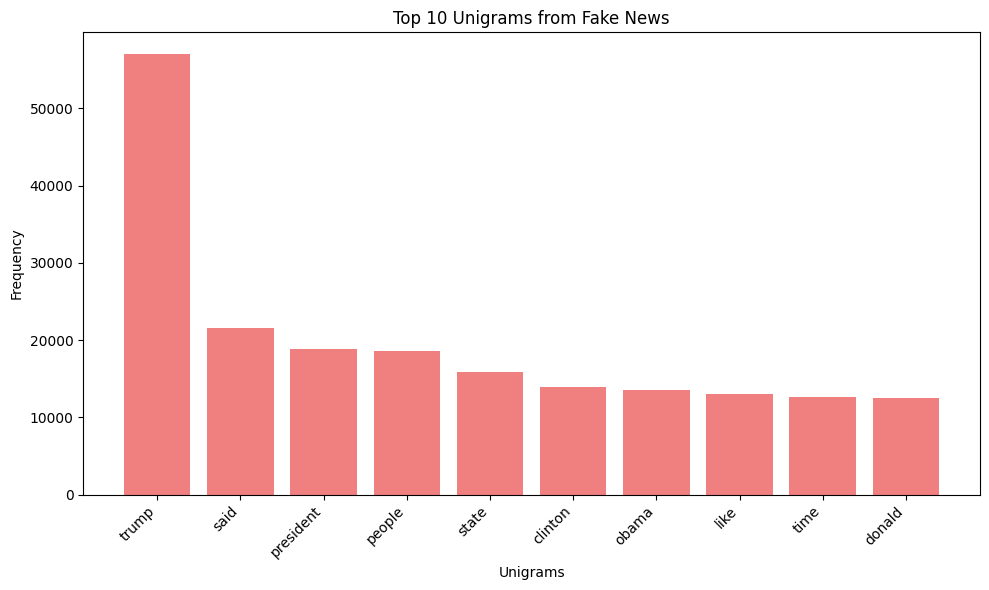

In [150]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Filtering fake news
fake_news_df = train_df[train_df['news_label'] == 0]

# Preparing texts: converting lemmatized_text (list of tokens) to string, handling NaNs
texts = fake_news_df['lemmatized_text'].dropna().apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
texts = texts.fillna('') if hasattr(texts, 'fillna') else texts

# Using CountVectorizer to get unigrams frequency
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 1))
X = vectorizer.fit_transform(texts)

# Sum counts of each unigram
unigram_counts = X.sum(axis=0)

# Mapping the vocabulary to counts
unigram_freq = [(unigram, unigram_counts[0, idx]) for unigram, idx in vectorizer.vocabulary_.items()]
unigram_freq = sorted(unigram_freq, key=lambda x: x[1], reverse=True)

# Retrieve top 10 unigrams
top_10_unigrams = unigram_freq[:10]

# Print top 10 unigrams with frequencies
print("Top 10 unigrams from Fake News:")
for unigram, count in top_10_unigrams:
    print(f"{unigram} --> {count}")

# Visualize in bar graph
unigrams, counts = zip(*top_10_unigrams)
plt.figure(figsize=(10, 6))
plt.bar(unigrams, counts, color='lightcoral')
plt.title('Top 10 Unigrams from Fake News')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 bigrams from Fake News:
donald trump: 11123
hillary clinton: 4981
white house: 4682
united state: 4450
new york: 2928
president trump: 2809
president obama: 2778
fox news: 2395
barack obama: 1608
trump supporter: 1607


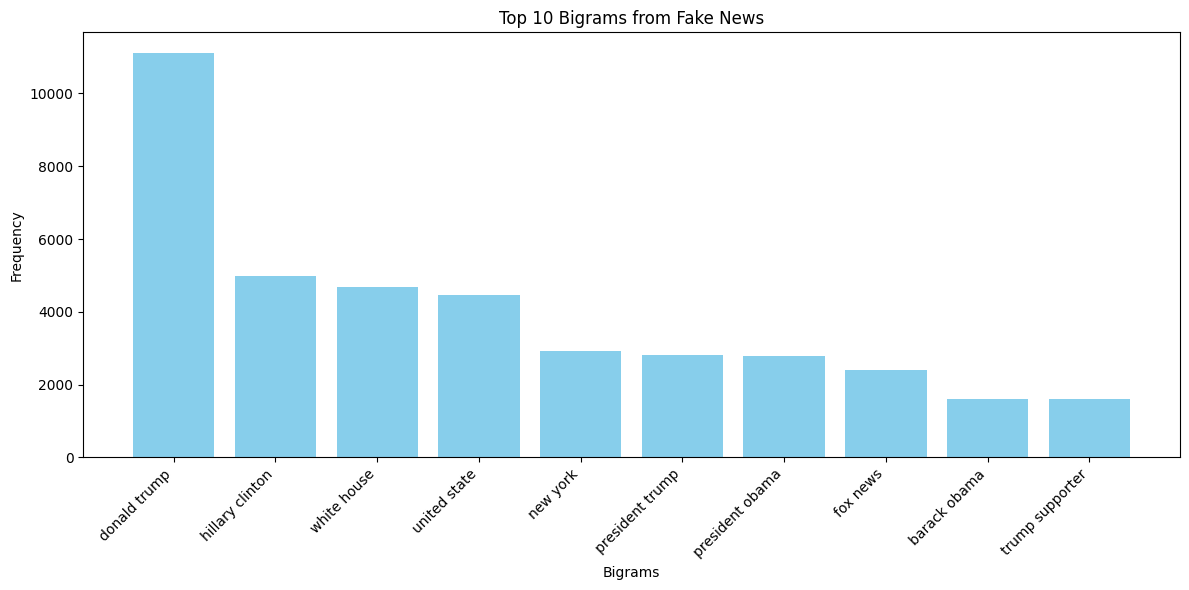

In [151]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Filtering fake news
fake_news_df = train_df[train_df['news_label'] == 0]

# Preparing texts: converting lemmatized_text (list of tokens) to string, handling NaNs
texts = fake_news_df['lemmatized_text'].dropna().apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
texts = texts.fillna('') if hasattr(texts, 'fillna') else texts

# Using CountVectorizer to get bigrams frequency
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))
X = vectorizer.fit_transform(texts)

# Sum counts of each bigram
bigram_counts = X.sum(axis=0)

# Mapping the vocabulary to counts
bigram_freq = [(bigram, bigram_counts[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# Retrieve top 10 bigrams
top_10_bigrams = bigram_freq[:10]

# Print top 10 bigrams with frequencies
print("Top 10 bigrams from Fake News:")
for bigram, count in top_10_bigrams:
    print(f"{bigram}: {count}")

# Visualize in bar graph
bigrams, counts = zip(*top_10_bigrams)
plt.figure(figsize=(12, 6))
plt.bar(bigrams, counts, color='skyblue')
plt.title('Top 10 Bigrams from Fake News')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 trigrams from Fake News:
donald trump realdonaldtrump --> 1169
new york time --> 1055
black life matter --> 1006
president donald trump --> 681
news century wire --> 648
president united state --> 638
president barack obama --> 624
video screen capture --> 493
century wire say --> 485
image video screen --> 475


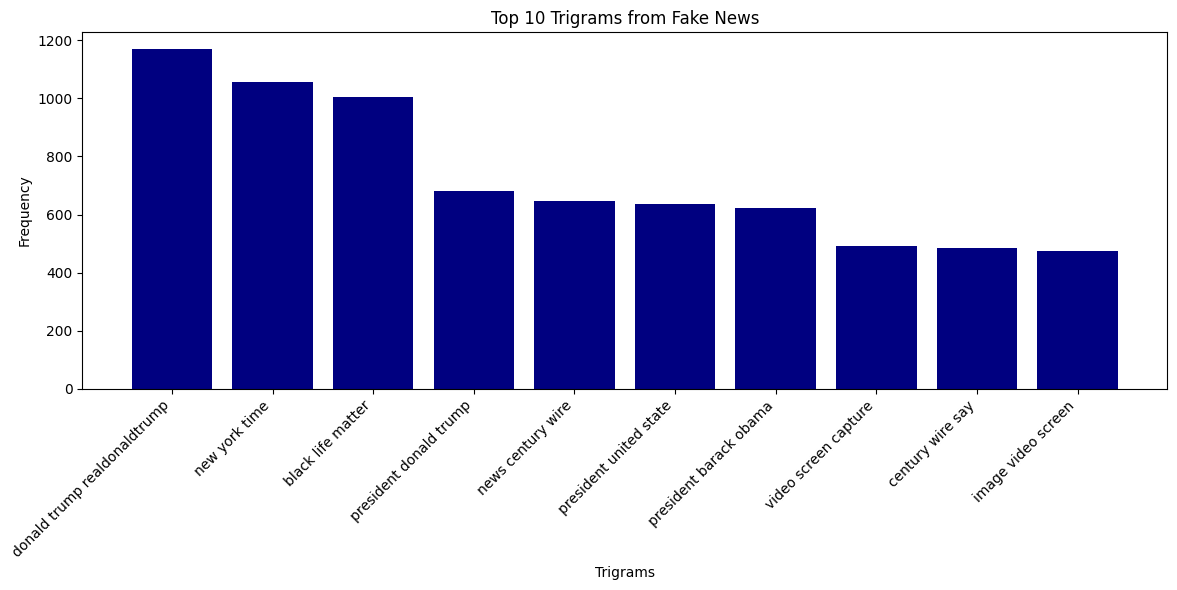

In [152]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Filtering fake news
fake_news_df = train_df[train_df['news_label'] == 0]

# Preparing texts --> converting lemmatized_text (list of tokens) to string, handling NaNs
texts = fake_news_df['lemmatized_text'].dropna().apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
texts = texts.fillna('') if hasattr(texts, 'fillna') else texts

# Using CountVectorizer to get trigrams frequency
vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3))
X = vectorizer.fit_transform(texts)

# Sum counts of each trigram
trigram_counts = X.sum(axis=0)

# Mapping the vocabulary to counts
trigram_freq = [(trigram, trigram_counts[0, idx]) for trigram, idx in vectorizer.vocabulary_.items()]
trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)

# Retrieve top 10 trigrams
top_10_trigrams = trigram_freq[:10]

# Print top 10 trigrams with frequencies
print("Top 10 trigrams from Fake News:")
for trigram, count in top_10_trigrams:
    print(f"{trigram} --> {count}")

# Visualize in bar graph
trigrams, counts = zip(*top_10_trigrams)
plt.figure(figsize=(12, 6))
plt.bar(trigrams, counts, color='navy')
plt.title('Top 10 Trigrams from Fake News')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [103]:
#Intsalling genism library
#!pip install gensim

   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
    --------------------------------------- 0.5/24.4 MB 4.2 MB/s eta 0:00:06
   - -------------------------------------- 1.0/24.4 MB 4.2 MB/s eta 0:00:06
   - -------------------------------------- 1.0/24.4 MB 4.2 MB/s eta 0:00:06
   - -------------------------------------- 1.0/24.4 MB 4.2 MB/s eta 0:00:06
   --- ------------------------------------ 1.8/24.4 MB 1.8 MB/s eta 0:00:13
   ---- ----------------------------------- 2.6/24.4 MB 2.1 MB/s eta 0:00:11
   ------ --------------------------------- 3.7/24.4 MB 2.5 MB/s eta 0:00:09
   -------- ------------------------------- 5.0/24.4 MB 2.9 MB/s eta 0:00:07
   --------- ------------------------------ 6.0/24.4 MB 3.2 MB/s eta 0:00:06
   ------------ --------------------------- 7.6/24.4 MB 3.6 MB/s eta 0:00:05
   -------------- ------------------------- 8.7/24.4 MB 3.8 MB/s eta 0:00:05
   --------------- ------------------------ 9.7/24.4 MB 3.8 MB/s eta 0:00:04
   ---

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

# Step 1: Initializing Word2Vec model by downloading "word2vec-google-news-300"
word2vec_model = api.load("word2vec-google-news-300")

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [106]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
import numpy as np

# Function to get average Word2Vec vector for a document
def document_vector(model, doc):
    words = doc.split()
    word_vecs = [model[word] for word in words if word in model]
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)

# Extracting vectors for training data from cleaned_text
train_vectors = train_df['cleaned_text'].fillna('').apply(lambda x: document_vector(word2vec_model, x))
X_train = np.vstack(train_vectors.values)

# Extracting vectors for validation data from cleaned_text
val_vectors = val_df['cleaned_text'].fillna('').apply(lambda x: document_vector(word2vec_model, x))
X_val = np.vstack(val_vectors.values)

## Extract the target variable for the training data and validation data
# Extracting the target variables
y_train = train_df['news_label'].values
y_val = val_df['news_label'].values

# Performing Validation checks
print("X_train shape -->", X_train.shape)  # Expect (num_train_samples, 300)
print("X_val shape -->", X_val.shape)    # Expect (num_val_samples, 300)

print("y_train shape -->", y_train.shape)  # Expect (num_train_samples,)
print("y_val shape -->", y_val.shape)    # Expect (num_val_samples,)

print("Number of zero vectors in X_train -->", np.sum(np.all(X_train == 0, axis=1)))
print("Number of zero vectors in X_val -->", np.sum(np.all(X_val == 0, axis=1)))

print("Training label distribution -->", dict(zip(*np.unique(y_train, return_counts=True))))
print("Validation label distribution -->", dict(zip(*np.unique(y_val, return_counts=True))))

# Spot check example
sample_index = 0
print("Sample text (train) -->", train_df['cleaned_text'].iloc[sample_index])
print("Sample vector (first 5 dims) -->", X_train[sample_index][:5])

X_train shape --> (31458, 300)
X_val shape --> (13482, 300)
y_train shape --> (31458,)
y_val shape --> (13482,)
Number of zero vectors in X_train --> 20
Number of zero vectors in X_val --> 10
Training label distribution --> {0: 16461, 1: 14997}
Validation label distribution --> {0: 7062, 1: 6420}
Sample text (train) --> lebanon identifies soldiers killed in islamic state captivity beirut reuters lebanon has identified the bodies of of its soldiers found along the syrian border in a zone taken back from islamic state last week state news agency nna said on wednesday an offensive against the enclave ended with the evacuation of islamic state militants and their families to eastern syria under a hezbollahbrokered deal syria s government and lebanon s hezbollah allowed a convoy of about lightly armed fighters and relatives to evacuate surrendering their border enclave as part of the agreement is militants identified where they had buried the soldiers lebanon s army chief said dna tests con

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [108]:
## Initialise Logistic Regression model
logireg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

## Train Logistic Regression model on training data
logireg.fit(X_train, y_train)

## Predict on validation data
y_pred = logireg.predict(X_val)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [109]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Printing the metrics for Logistic Regression model
print(f"Accuracy -->  {accuracy:.4f}")
print(f"Precision --> {precision:.4f}")
print(f"Recall -->    {recall:.4f}")
print(f"F1-Score -->  {f1:.4f}")

Accuracy -->  0.9599
Precision --> 0.9516
Recall -->    0.9648
F1-Score -->  0.9582


In [110]:
# Classification Report
print(classification_report(y_val, y_pred, target_names=['Fake News', 'True News']))

              precision    recall  f1-score   support

   Fake News       0.97      0.96      0.96      7062
   True News       0.95      0.96      0.96      6420

    accuracy                           0.96     13482
   macro avg       0.96      0.96      0.96     13482
weighted avg       0.96      0.96      0.96     13482



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [111]:
## Initialise Decision Tree model
dtree_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dtree_model.fit(X_train, y_train)

## Predict on validation data
y_pred_dtree = dtree_model.predict(X_val)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [113]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_dtree = accuracy_score(y_val, y_pred_dtree)
precision_dtree = precision_score(y_val, y_pred_dtree)
recall_dtree = recall_score(y_val, y_pred_dtree)
f1_dtree = f1_score(y_val, y_pred_dtree)

# Printing the metrics from decision tree model
print(f"Accuracy -->  {accuracy_dtree:.4f}")
print(f"Precision --> {precision_dtree:.4f}")
print(f"Recall -->    {recall_dtree:.4f}")
print(f"F1-Score -->  {f1_dtree:.4f}")


Accuracy -->  0.8923
Precision --> 0.9029
Recall -->    0.8671
F1-Score -->  0.8846


In [114]:
# Classification Report

print(classification_report(y_val, y_pred_dtree, target_names=['Fake News', 'True News']))

              precision    recall  f1-score   support

   Fake News       0.88      0.92      0.90      7062
   True News       0.90      0.87      0.88      6420

    accuracy                           0.89     13482
   macro avg       0.89      0.89      0.89     13482
weighted avg       0.89      0.89      0.89     13482



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [115]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

## Train Random Forest model on training data
rf_model.fit(X_train, y_train)

## Predict on validation data
y_pred_rf = rf_model.predict(X_val)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [116]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

# Printing the metrics from Random Forest model
print(f"Accuracy -->  {accuracy_rf:.4f}")
print(f"Precision --> {precision_rf:.4f}")
print(f"Recall -->    {recall_rf:.4f}")
print(f"F1-Score -->  {f1_rf:.4f}")

Accuracy -->  0.9552
Precision --> 0.9555
Recall -->    0.9502
F1-Score -->  0.9528


In [117]:
# Classification Report
print(classification_report(y_val, y_pred_rf, target_names=['Fake News', 'True News']))

              precision    recall  f1-score   support

   Fake News       0.95      0.96      0.96      7062
   True News       0.96      0.95      0.95      6420

    accuracy                           0.96     13482
   macro avg       0.96      0.95      0.96     13482
weighted avg       0.96      0.96      0.96     13482



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

**Analysis and Patterns Observed :**
    
    ✔️On observing the patterns in the True and Fake news, it is evident that True news is composed of  formal and professional content in a systematic way . Whereas, Fake News comprises more of sentimental language , provocative and not-so formal content.  These patterns are evident from character length analysis, word clouds, and some from n-gram frequency patterns.

    ✔️To represent these semantic differences appropriately, I have used the pre-trained Word2Vec embeddings to convert text into 300-dimensional vectors. This allowed the models to interpret the contextual meaning of words rather than relying on frequency-based features alone.


**Approach, models and metrics used :**

    ✔️I have analyzed three machine learning models on these semantic features , assessing the impact of each model using the following metrics :

    Model	            Accuracy (%)	Precision (%)	Recall (%)	F1-Score (%)
    Logistic Regression	   95.99	        95.16	     96.48	       95.82
    Decision Tree	           89.23	        90.29	     86.71	       88.46
    Random Forest	           95.52	        95.55	     95.02	       95.28



**Comparison among the models :**

    ✔️Both Logistic Regression and Random Forest performed well, achieving around --> 96% accuracy. Also, Logistic Regression slightly outperformed Random Forest in recall (96.48%) and F1-score (95.82%), resulting in a well balanced and resilient model for this binary classification task.

    ✔️I have also considered the F1-score as the primary evaluation metric , as it balances precision (minimizing false positives) and recall (minimizing false negatives) — both crucial in detecting fake news accurately.

**Summary :**

    ✔️Logistic Regression, combined with semantic embeddings from Word2Vec, achieved an optimal balance between accuracy, interpretability, and computational efficiency. This highlights that, even simple models can deliver strong performance when used along with robust semantic features, proving that this pipeline is a practical solution for real-world fake news detection tasks.
